In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

In [72]:
df = pd.DataFrame({
    'group':           ['CERN-DCA',   'MIF-TEACH', 'ART21', 'Startup', 'Company'],
    'Money-now':       [4200.0 * 0.9, 800.0,       2000.0,  0.0,       5000.0   ],
    'Money-next':      [4200.0 * 0.9, 1000.0,      5000.0,  2000.0,    5000.0   ],
    'Money-potential': [4200.0 * 0.9, 2000.0,      5000.0,  5000.0,    5000.0   ],
    'Fun-now':         [0.10,         0.10,        0.50,    0.75,      0.75     ],
    'Fun-next':        [0.00,         0.00,        0.50,    0.75,      0.5      ],
    'Fun-potential':   [0.10,         0.30,        0.75,    1.00,      0.75     ],
    'Control':         [0.10,         0.50,        0.25,    1.00,      0.25     ],
    'Learning':        [0.10,         0.75,        0.75,    1.00,      1.00     ],
    'Learning':        [0.10,         0.75,        0.75,    1.00,      1.00     ],
    'Goodness':        [0.50,         1.00,        0.00,    0.75,      0.75     ],
})

In [73]:
df

,group,Money-now,Money-next,Money-potential,Fun-now,Fun-next,Fun-potential,Control,Learning,Goodness
0,CERN-DCA,3780.0,3780.0,3780.0,0.10,0.00,0.10,0.10,0.10,0.50
1,MIF-TEACH,800.0,1000.0,2000.0,0.10,0.00,0.30,0.50,0.75,1.00
2,ART21,2000.0,5000.0,5000.0,0.50,0.50,0.75,0.25,0.75,0.00
3,Startup,0.0,2000.0,5000.0,0.75,0.75,1.00,1.00,1.00,0.75
4,Company,5000.0,5000.0,5000.0,0.75,0.50,0.75,0.25,1.00,0.75


In [74]:
money_must = 5000.0
df['Money-now'] = df['Money-now'] / money_must
df['Money-next'] = df['Money-next'] / money_must
df['Money-potential'] = df['Money-potential'] / money_must

In [75]:
df

,group,Money-now,Money-next,Money-potential,Fun-now,Fun-next,Fun-potential,Control,Learning,Goodness
0,CERN-DCA,0.756,0.756,0.756,0.10,0.00,0.10,0.10,0.10,0.50
1,MIF-TEACH,0.160,0.200,0.400,0.10,0.00,0.30,0.50,0.75,1.00
2,ART21,0.400,1.000,1.000,0.50,0.50,0.75,0.25,0.75,0.00
3,Startup,0.000,0.400,1.000,0.75,0.75,1.00,1.00,1.00,0.75
4,Company,1.000,1.000,1.000,0.75,0.50,0.75,0.25,1.00,0.75


In [ ]:
priority = 

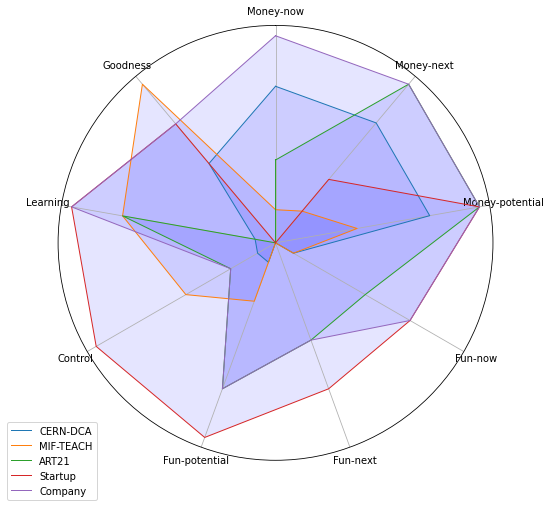

In [76]:
plt.figure(figsize=(8, 8))

# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
##plt.ylim(0,40)

# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
for i, g in enumerate(df['group']):
    
    values=df.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=g)
    ax.fill(angles, values, 'b', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

In [91]:
df1 = df.transpose().rename(columns = df.group).drop(['group'])
df1

,CERN-DCA,MIF-TEACH,ART21,Startup,Company
Money-now,0.756,0.16,0.4,0,1
Money-next,0.756,0.2,1,0.4,1
Money-potential,0.756,0.4,1,1,1
Fun-now,0.1,0.1,0.5,0.75,0.75
Fun-next,0,0,0.5,0.75,0.5
Fun-potential,0.1,0.3,0.75,1,0.75
Control,0.1,0.5,0.25,1,0.25
Learning,0.1,0.75,0.75,1,1
Goodness,0.5,1,0,0.75,0.75


In [92]:
df1.sum()

CERN-DCA     3.168
MIF-TEACH    3.410
ART21        5.150
Startup      6.650
Company      7.000
dtype: float64